In [1]:
import numpy as np

Computations on Numpy arrays can be very fast, or it can be very slow.The key to making it fast is to use <i>vectorized</i> operations,generally implemented through Numpy's <i>universal</i> functions(ufuncs).

# The Slowness of Loops

Python's default implementation (known as CPython) does some operations very slowly. This is in part due to the dynamic , interpreted nature of the language: the fact that types are flexible , so that sequences of operations can't be compiled down to efficient machine code as in languages like C and Fortran.

The relative sluggishness of Python generally manifests iteself in situations where small operations are being repeated - for instance looping over arrays to operatore on each element

In [8]:
%%timeit
np.random.seed(0) # for reproductivility

def compute_reciprocate(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i]= 1.0 / values[i]
    return output

values = np.random.randint(1,100,size=1000000)
compute_reciprocate(values)

3.84 s ± 489 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


It takes several seconds to compute these million operations and to store the result! When even cell phones have processing speeds measured in Giga-FLOPS (i.e., billions of numerical operations per second), this seems almost absurdly slow. It turns out that the bottleneck here is not the operations themselves, but the type-checking and function dispatches that CPython must do at each cycle of the loop. Each time the reciprocal is computed, Python first examines the object's type and does a dynamic lookup of the correct function to use for that type. If we were working in compiled code instead, this type specification would be known before the code executes and the result could be computed much more efficiently.

# Introducing UFuncs

Vectorized operations can be accomplished by simply performing an operation on the array, which will then be applied to each element. This vectorized approach is designed to push the loop into the compiled layer that underlies Numpy, leading to much faster execution

In [10]:
%timeit (compute_reciprocate(values))

25 µs ± 6.66 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [11]:
%timeit (1.0 / values)

2.83 µs ± 380 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


we can see that it is faster 

Vectorized operations in Numpy are implemented via <i> ufuncs</i> , whose main purpose is to quickly execute repeated operations on values in Numpy arrays. Ufuncs are extremely flexible.

In [12]:
np.arange(5) / np.arange(1,6)

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

In [13]:
# also act on multi dimensional
x = np.arange(9).reshape((3,3))
2**x

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]], dtype=int32)

## Array arithmetic

In [14]:
x = np.arange(4)
print(f'x = {x}')
print(f'x + 5 = {x+5}')
print(f'x - 5 = {x-5}')
print(f'x * 2 = {x*2}')
print(f'x / 2 = {x/2}')
print(f'x // 2 = {x//2}') # floor division

x = [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]
x / 2 = [0.  0.5 1.  1.5]
x // 2 = [0 0 1 1]


In [15]:
print(-x) # for negation
print(x**2)
print(x%2)

[ 0 -1 -2 -3]
[0 1 4 9]
[0 1 0 1]


In [16]:
-(0.5*x + 1) ** 2

array([-1.  , -2.25, -4.  , -6.25])

Each of these arithmetic operations are simply convenient wrappers around specific functions built into NumPy; for example, the <mark>+</mark> operator is a wrapper for the <mark>add</mark> function:



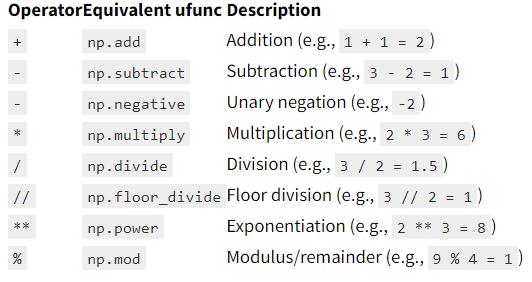

## Absolute value

In [17]:
x = np.array([-2,-1,0,1,2])
abs(x) # python built in abs function

array([2, 1, 0, 1, 2])

In [18]:
np.absolute(x) # numpy corresponding ufunc

array([2, 1, 0, 1, 2])

In [19]:
np.abs(x)

array([2, 1, 0, 1, 2])

In [20]:
# it can also handle complex data
x=np.array([3-4j , 4-3j,2+0j,0+1j])
np.abs(x)

array([5., 5., 2., 1.])

## Trigonometric functions

In [21]:
theta = np.linspace(0,np.pi , 3)

In [22]:
print(f'theta = {theta}')
print(f'sin(theta) = {np.sin(theta)}')
print(f'cos(theta) = {np.cos(theta)}')
print(f'tan(theta) = {np.tan(theta)}')

theta = [0.         1.57079633 3.14159265]
sin(theta) = [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) = [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) = [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


The values are computed to within machine precision, which is why values that should be zero do not always hit exactly zero

In [23]:
x = [-1,0,1]
print(f'x = {x}')
print(f'arcsin(x) = {np.arcsin(x)}')
print(f'arccos(x) = {np.arccos(x)}')
print(f'arctan(x) = {np.arctan(x)}')

x = [-1, 0, 1]
arcsin(x) = [-1.57079633  0.          1.57079633]
arccos(x) = [3.14159265 1.57079633 0.        ]
arctan(x) = [-0.78539816  0.          0.78539816]


## Exponents and logarithms

In [24]:
x = [1,2,3]
print(f'x = {x}')
print(f'e^x = {np.exp(x)}')
print(f'2^x = {np.exp2(x)}')
print(f'3^x = {np.power(3,x)}')

x = [1, 2, 3]
e^x = [ 2.71828183  7.3890561  20.08553692]
2^x = [2. 4. 8.]
3^x = [ 3  9 27]


In [25]:
x= [1,2,4,10]
print(f'ln(x) = {np.log(x)}') # natural logarithm
print(f'log2(x) = {np.log2(x)}') # base 2 logarithm
print(f'log10(x) = {np.log10(x)}') # base 10 logarithm

ln(x) = [0.         0.69314718 1.38629436 2.30258509]
log2(x) = [0.         1.         2.         3.32192809]
log10(x) = [0.         0.30103    0.60205999 1.        ]


In [26]:
# specialized versions that are useful for maintaining precision with very small input
x = [0,0.001,0.01,0.1]
print(f'exp(x) - 2 = {np.expm1(x)}')
print(f'log(1+x) = {np.log1p(x)}')

exp(x) - 2 = [0.         0.0010005  0.01005017 0.10517092]
log(1+x) = [0.         0.0009995  0.00995033 0.09531018]


## Specialized ufuncs

NumPy has many more ufuncs available, including hyperbolic trig functions, bitwise arithmetic, comparison operators, conversions from radians to degrees, rounding and remainders, and much more. 

Another excellent source for more specialized and obscure ufuncs is the submodule <mark>scipy.special</mark>. If you want to compute some obscure mathematical function on your data, chances are it is implemented in <mark>scipy.special</mark>. 

In [28]:
from scipy import special

In [29]:
# Gamma functions (generalized factorials) and related functions
x = [1,5,10]
print(f'gamma(x) = {special.gamma(x)}')
print(f'ln|gamma(x)| = {special.gammaln(x)}')
print(f'beta(x,2) = {special.beta(x,2)}')

gamma(x) = [1.0000e+00 2.4000e+01 3.6288e+05]
ln|gamma(x)| = [ 0.          3.17805383 12.80182748]
beta(x,2) = [0.5        0.03333333 0.00909091]


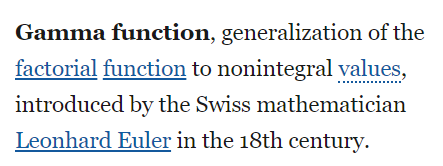

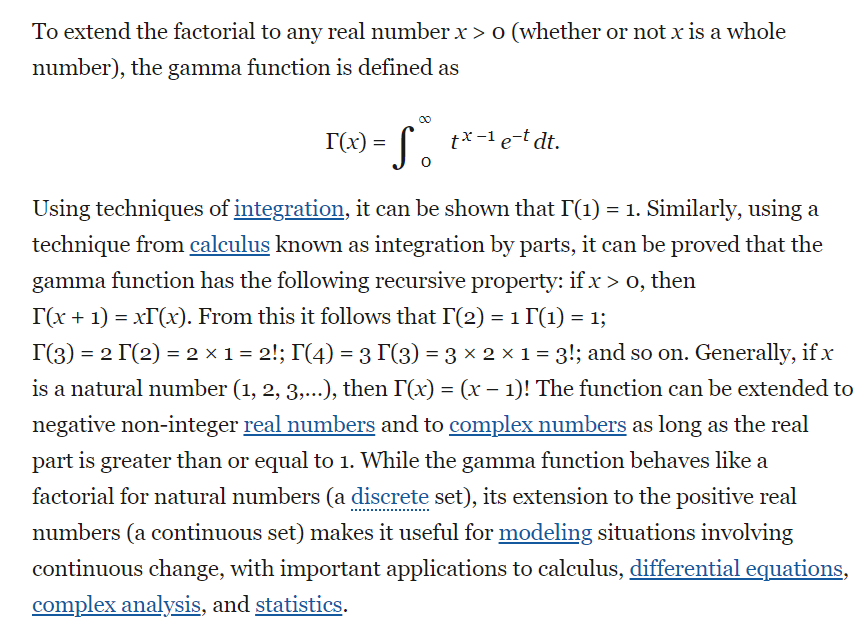

In [31]:
# Error function (integral of Gaussian)
# its complement , and its inverse
x = np.array([0,0.3,0.7,1.0])
print(f'erf(x) = {special.erf(x)}')
print(f'erfc(x) = {special.erfc(x)}')
print(f'erfinv(x) = {special.erfinv(x)}')

erf(x) = [0.         0.32862676 0.67780119 0.84270079]
erfc(x) = [1.         0.67137324 0.32219881 0.15729921]
erfinv(x) = [0.         0.27246271 0.73286908        inf]


## Specifying output

For large calculations, it is sometimes useful to be able to specify the array where the results of the calculations will be stored.Rather than crating a temporary array, this can be used to write  computation results directly to the memory location where you'd like them to be.For all ufuncs,this can be done using the <mark>out</mark> argument of the function:

In [32]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x,10,out=y)
print(y)

[ 0. 10. 20. 30. 40.]


In [33]:
y = np.zeros(10)
np.power(2,x,out=y[::2])
print(y)

[ 1.  0.  2.  0.  4.  0.  8.  0. 16.  0.]


If we had instead written <mark>y[::2] = 2 ** x</mark>, this would have resulted in the creation of a temporary array to hold the results of <mark>2 ** x</mark>, followed by a second operation copying those values into the y array. This doesn't make much of a difference for such a small computation, but for very large arrays the memory savings from careful use of the <mark>out</mark> argument can be significant.

## Aggregates

For binary ufuncs, there are some interesting aggregates that can be computed directly from the object. For example, if we'd like to reduce an array with a particular operation, we can use the <mark>reduce</mark> method of any ufunc. A reduce repeatedly applies a given operation to the elements of an array until only a single result remains.

For example, calling <mark>reduce</mark> on the add ufunc returns the sum of all elements in the array:

In [34]:
x = np.arange(1,6)
np.add.reduce(x)

15

In [35]:
np.multiply.reduce(x)

120

If we'd like to store all the intermediate results of the computation, we can instead use <mark>accumulate</mark>:

In [36]:
np.multiply.accumulate(x)

array([  1,   2,   6,  24, 120])

In [37]:
# alternatives
print(np.sum(x))
print(np.prod(x))
print(np.cumsum(x))
print(np.cumprod(x))

15
120
[ 1  3  6 10 15]
[  1   2   6  24 120]


## Outer products

In [38]:
x = np.arange(1,6)
np.multiply.outer(x,x)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

# Summing the values in an Array

In [39]:
big_array = np.random.rand(10000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

1.98 s ± 182 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
17.6 ms ± 1.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Minimum and Maximum

In [40]:
%timeit min(big_array)
%timeit np.min(big_array)

1.17 s ± 64.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
7.4 ms ± 718 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [41]:
# we can use shorter systax or array object itself
print(big_array.min(),big_array.max(),big_array.sum())

1.0361921209955938e-08 0.9999998631738124 4999989.048710695


## Multi dimensional aggregates

In [42]:
M = np.random.random((3,4))

In [43]:
print(M)

[[0.28046275 0.25111138 0.76427683 0.15994263]
 [0.5147285  0.52641823 0.18751346 0.93062149]
 [0.97989278 0.70398586 0.94448918 0.17121204]]


In [44]:
M.sum()

6.414655134001478

In [45]:
M.min(axis =0) # minimum value within each column 

array([0.28046275, 0.25111138, 0.18751346, 0.15994263])

In [46]:
M.max(axis=1) # maximum value within each row

array([0.76427683, 0.93062149, 0.97989278])

In [47]:
M.argmin(axis=0) # index

array([0, 0, 1, 0], dtype=int64)

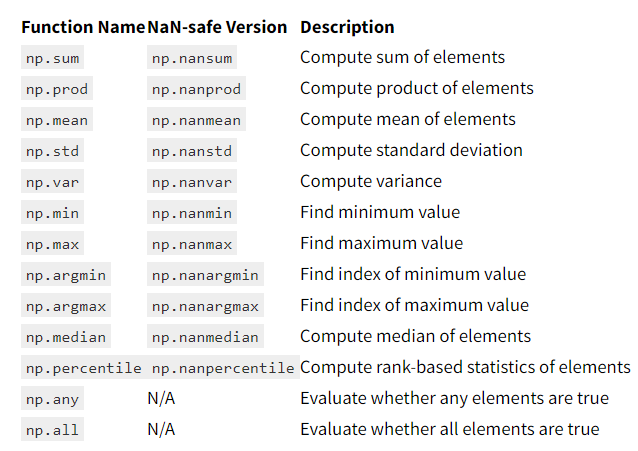

# BroadCasting

Another means of vectorizing operations is to use NumPy's broadcasting functionality. Broadcasting is simply a set of rules for applying binary ufuncs (e.g., addition, subtraction, multiplication, etc.) on arrays of different sizes.

In [48]:
a = np.array([0,1,2])
b = np.array([5,5,5])
a + b

array([5, 6, 7])

Broadcasting allows these types of binary operations to be performed on arrays of different sizes–for example, we can just as easily add a scalar (think of it as a zero-dimensional array) to an array:

In [49]:
a + 5

array([5, 6, 7])

We can think of this as an operation that stretches or duplicates the value <mark>5</mark> into the array <mark>[5, 5, 5]</mark>, and adds the results. The advantage of NumPy's broadcasting is that this duplication of values does not actually take place, but it is a useful mental model as we think about broadcasting.

In [50]:
M = np.ones((3,3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [51]:
M + a 

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [52]:
a = np.arange(3)
b = np.arange(3)[:,np.newaxis] # column vector
print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [53]:
a + b # here we've stretched both a and b 
"""
a has become(stretched by row) -> [
[0 1 2]
[0 1 2]
[0 1 2]
]

b has become(stretched by col) -> [
[0 0 0]
[1 1 1]
[2 2 2]
]
"""

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

## Rules of Broadcasting

<ul>
    <li> Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading(left) side.</li>
    <li> Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape </li>
    <li> Rule 3: If any dimension the sized disagree and neither is equal to 1, an error is raised</li>
</ul>

### Example of Broadcasting 

In [54]:
M = np.ones((2,3))
a = np.arange(3)
print(M.shape)
print(a.shape)

(2, 3)
(3,)


In [55]:
# by rule 1 a will become -> (1,3)
# by rule 2 a will become -> (2,3)
# the shapes match and final result will be (2,3)
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

In [56]:
a = np.arange(3).reshape((3,1))
b = np.arange(3)
print(a.shape)
print(b.shape)

(3, 1)
(3,)


In [57]:
# by rule 1 , we must padd the shape of b with ones
# now b has become -> (1,3)
# by rule 2 we must upgragde each of 1 to match 
# b -> (3,3) , a -> (3,3)
# shapes match and final result will be (3,3)
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [58]:
M = np.ones((3,2))
a = np.arange(3)
print(M.shape)
print(a.shape)

(3, 2)
(3,)


In [59]:
# by rule 1, we must pad a with ones
# a -> (1,3)
# by rule 2, the first dimension of a is stretched to match that of M
# m -> (3,2)
# a -> (3,2)
# shape don't match , an error will occur
M + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

In [60]:
# we can do this by, 
M + a[:,np.newaxis]

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

these broadcasting rules apply to any binary ufunc. For example, here is the <mark>logaddexp(a, b)</mark> function, which computes <mark>log(exp(a) + exp(b))</mark> with more precision than the naive approach:

In [62]:
np.logaddexp(M,a[:,np.newaxis])

array([[1.31326169, 1.31326169],
       [1.69314718, 1.69314718],
       [2.31326169, 2.31326169]])

# Practice Problem

 Imagine you have an array of 10 observations, each of which consists of 3 values. Using the standard convention (see Data Representation in Scikit-Learn), we'll store this in a 10×3
 array:

In [63]:
x = np.random.random((10,3))

In [64]:
# we can compute the mean accross the first dimension
xmean = x.mean(axis=0)
xmean

array([0.52762738, 0.40216567, 0.60823771])

In [65]:
# now we can center the x arrray by subtracting the mean 
x_centered = x - xmean

In [66]:
# to double check, we can check that the centerd array has near zero mean
x_centered.mean(axis=0)

array([ 1.11022302e-17, -2.22044605e-17,  4.44089210e-17])

To within machine precision , the mean is now zero

## Plotting a 2-D function

One place that broadcasting is very useful is in displaying images based on two-dimensional functions. If we want to define a function <math>z=f(x,y)</math>
, broadcasting can be used to compute the function across the grid:

In [67]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt

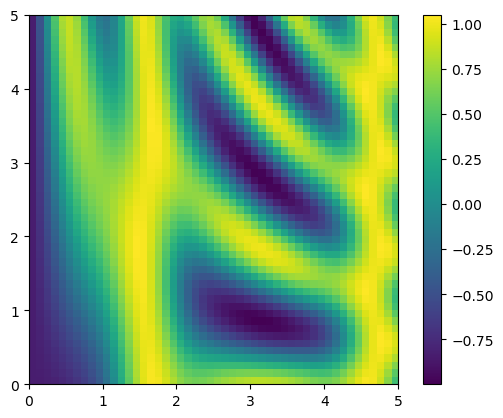

In [69]:
plt.imshow(z,origin='lower',extent=[0,5,0,5])
plt.colorbar();

The result is a compelling visualization of the two-dimensional function.